<a id="1"></a>
# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:White;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Hotel Bookings</p>


<p style="text-align:center; ">
<img src="https://www.luxuryabode.com/mona/img/hotels.jpg" width="400" height="100">
</p>

**Business Problem**
In recent times city hotels and resort hotels have seen high cancellation rates. Each hotel is going through crisis like less revenue. In this project we will be analyzing the reasons of cancellation and also to improve the maintenance and revenue of the hotels.

<a id="3"></a>
# <p style="padding:10px;background-color:Brown;margin:0;color:White;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Source </p>

**This Data set is from Kaggle**
https://www.kaggle.com/datasets/mojtaba142/hotel-booking

# Research Questions
* What is the range of the number of cancellation?
* What is the cancellation rate in different hotel types?
* What is the avg reservation rate in each hotel?
* What are the factors that affects hotel reservation cancellation?
* What are the top countries with the maximum reservation cancellation?

<a id="3"></a>
# <p style="padding:10px;background-color:Brown;margin:0;color:White;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Libraries </p>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id="3"></a>
# <p style="padding:10px;background-color:Brown;margin:0;color:White;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Set </p>

In [4]:
df = pd.read_csv ('hotel_bookings 2.csv')

<a id="3"></a>
# <p style="padding:10px;background-color:Brown;margin:0;color:White;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Exploratory Analysis and Data Cleaning</p>

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [6]:
df.shape

(119390, 32)

# Check for Data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Insights :**
* We can see the different data types like **object** for text format and **int64** for numeric data and
 most of the data types are correct except **'reservation_status_date** which should be in date format, let's change that below. 

**Change the data type :**

In [8]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], dayfirst=True )

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

**Insights :**
* We can see that the data type of column **'reservation_status_date'** has now been changed to **'datetime64'**

# Check for Null Values

In [10]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Insights :**
* We can see there are 4 columns with nulls values, but we will only be removing the null values from column **'children'** and **'country'** and will **drop** the other two columns **'agent'** and **'company'** as they have large number of null values which will be difficult to work with and they are also not relevant for our analysis in this project.

**Drop Column and remove Null values :**

In [11]:
df.drop(['company', 'agent'], axis = 1, inplace = True)
df.dropna(inplace = True)

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

**Insights :**
* All the null values and irrelevant columns have been removed and now we have a **clean data** to work with.

# Check for Outliers 

In [13]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


**Insights :**
* We will only be removing the outliers from the column which is relevant to this project so its **'adr'** column for us and its **max value** is showing up to **5400** which is very high so let's remove this outlier.

**Removing Outlier:**

In [14]:
df = df[df['adr']<5000]

<a id="3"></a>
# <p style="padding:10px;background-color:Brown;margin:0;color:White;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Analysis and Visualization </p>

# Reservation Status Count

In [15]:
# Lets check the percentage of cancellations:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
cancelled_perc

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64

**Let's create a Bar Chart for the above :**

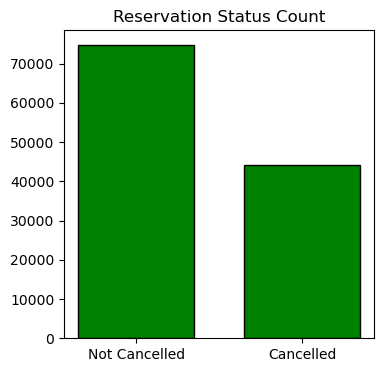

In [16]:
plt.figure(figsize = (4,4))
plt.title('Reservation Status Count')
plt.bar(['Not Cancelled', 'Cancelled'], df['is_canceled'].value_counts() ,edgecolor = 'k', width = 0.7, color ='Green')
plt.show()

**Insights :**
* From the above chart we can see that number of cancellation **is more than 50%**

# Reservation in different Hotels

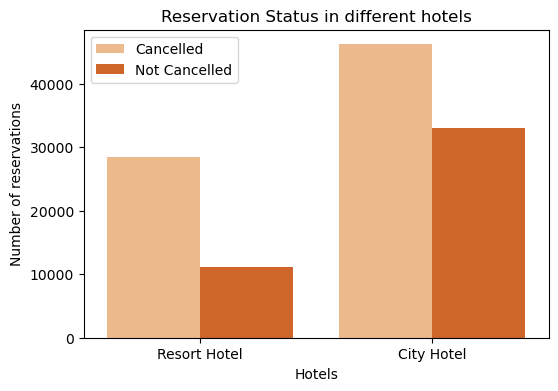

In [18]:
plt.figure(figsize =(6,4))
ax1 = sns.countplot(x= 'hotel', hue = 'is_canceled', data = df, palette = 'Oranges')
legend_labels = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation Status in different hotels', size = 12)
plt.xlabel('Hotels')
plt.ylabel('Number of reservations')
plt.legend(['Cancelled', 'Not Cancelled'])
plt.show()

**Insights :**
* We can clearly see that the cancellation in the **city hotel** is more than the cancellation in **resort hotel**. This could be due to the high prices of city hotels as resort prices are comparatively cheaper.Let's check that below.

# Avg Daily rate of City Hotel VS Resort Hotel

In [19]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [20]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [21]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

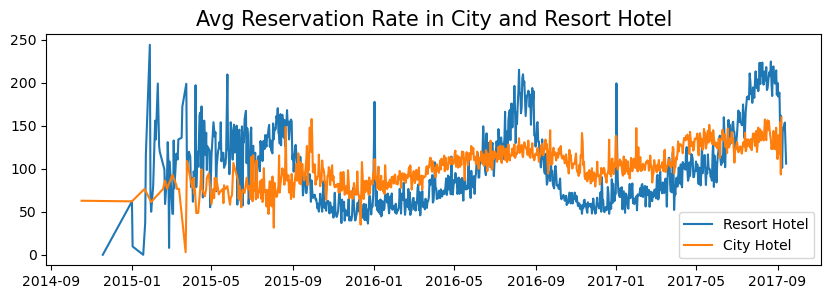

In [35]:
plt.figure(figsize = (10,3))
plt.title('Avg Reservation Rate in City and Resort Hotel', fontsize = 15)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 10)
plt.show()

**Insights :**
* As per the graph we can see there are some fluctuations in the prices. The peaks here could be because of the weekend or bank holidays rates, let's dig in deeper and check the frequency of the reservation status as per each month.

# Reservation Status per Month

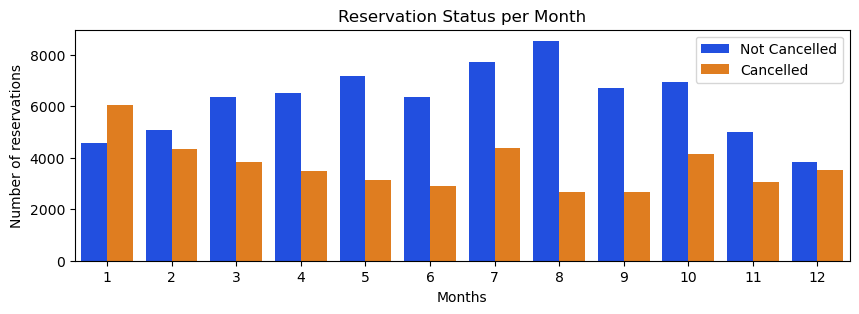

In [47]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (10,3))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data = df, palette = 'bright')
legend_labels = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation Status per Month', size = 12)
plt.xlabel('Months')
plt.ylabel('Number of reservations')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.show()

**Insights :**
* We can see that the highest number of cancellations is in the month of **January** and the highest number of reservation is in **august**. This could be due to the high prices in January, lets check the prices of hotels in each month.

# Hotel Prices per Month

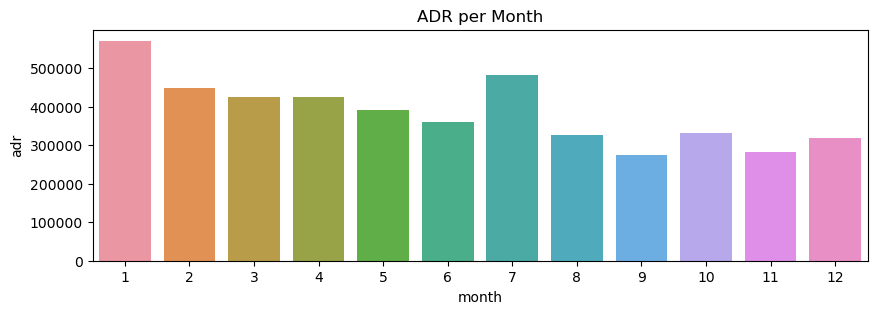

In [46]:
plt.figure(figsize = (10,3))
plt.title('ADR per Month', fontsize = 12)
sns.barplot(x='month',y='adr', data = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.show()

**Insights :**
* Now if you compare the above two charts we can clearly conclude that **the reason for more cancellation in the month of January is due to the high price in that month.**

# Cancellation for top 10 Countries

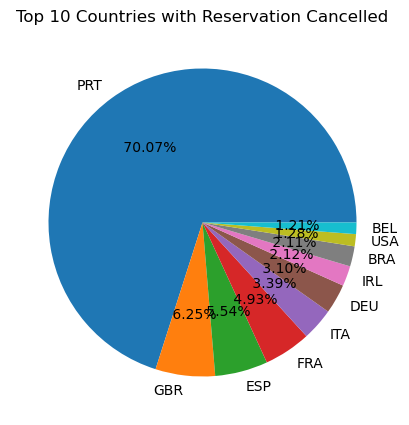

In [54]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (5,5))
plt.title('Top 10 Countries with Reservation Cancelled')
plt.pie(top_10_country, autopct = '% .2f%%', labels = top_10_country.index)
plt.show()

**Insights :**
* This clearly shows that the country with the highest number of cancellation is **Portugal** which is **70.7%**

# Check for the Booking Type

In [62]:
perc_market_segment = df['market_segment'].value_counts(normalize = True)perc_market_segment

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

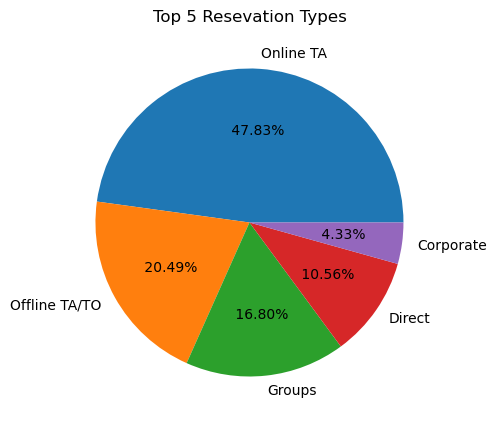

In [89]:
top_5_types = df['market_segment'].value_counts()[:5]
plt.figure(figsize = (5,5))
plt.title('Top 5 Resevation Types')
plt.pie(top_5_types , autopct = '% .2f%%', labels = top_5_types .index)
plt.show()

**Insights :**
* It clearly shows that **maximum** reservation is coming through **online booking** which is around **48%**, this could also be the reason of cancellation as users see all the pictures online and when they actually visit the hotel they don't like them and ended up canceling.

<a id="3"></a>
# <p style="padding:10px;background-color:Brown;margin:0;color:White;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Conclusion/Suggestions </p>

* Cancellation rates rises as the price does. In order to prevent cancellation of reservation hotels could work on their pricing strategies and try to lower the rates for specific hotels as per the locations.
* As the cancellation rate is higher in city hotels as compared to resort hotel, city hotel can provide reasonable discount on weekends or on holidays.
* Due to high rate of cancellation in January, hotel can start a campaign or marketing with a reasonable amount to prevent this.
* They can also increase the quality of their rooms and services mainly in Portugal to reduce the cancellation rate.
* Since booking are mainly coming through online channel, hotels should post good and real pictures of their premises with all detailed information so when the users visit the hotel they are not disappointed.

<a id="3"></a>
# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:White;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Thank You </p>